### Homework 4 : Pandas 

### Why do you need pandas?¶

When working with tabular or structured data (like R dataframe, SQL table, Excel spreadsheet, ...):**</br>
<br>
**Import data<br>
Clean up messy data<br>
Explore data, gain insight into data<br>
Process and prepare your data for analysis<br>
Analyse your data (together with scikit-learn, statsmodels, ...)<br>



*importing the Pandas library*

In [2]:
import pandas as pd

### Basic data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the Series object, and the DataFrame object.

#### Series
A Series is a basic holder for **one-dimensional labeled** data. It can be created much as a NumPy array is created:

In [3]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

#### Attributes of a Series: index and values
The series has a built-in concept of an index, which by default is the numbers 0 through N - 1

In [4]:
s.index


RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the .values attribute:



In [5]:
s.values


array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:



In [6]:
s[0]


0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [10]:
import numpy as np
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [11]:
s2['c']


2

In this way, a Series object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value:



In [12]:
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [13]:
population['France']


64.3

but with the power of numpy arrays:

In [14]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

We can index or slice the populations as expected:

In [15]:
population['Belgium']


11.3

Fancy indexing, like indexing with a list or boolean indexing:



In [16]:
population[['France', 'Netherlands']]


France         64.3
Netherlands    16.9
dtype: float64

In [17]:
population[population > 20]


Germany           81.3
France            64.3
United Kingdom    64.9
dtype: float64

A range of methods:



In [18]:
population.mean()


47.739999999999995

#### Alignment!
Only, pay attention to alignment: operations between series will align on the index:

In [19]:

s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [20]:
s1


Belgium    11.3
France     64.3
dtype: float64

In [21]:
s2

France     64.3
Germany    81.3
dtype: float64

In [22]:
s1 + s2


Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

### DataFrames: Multi-dimensional Data
A DataFrame is a tablular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.
One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [23]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


#### Attributes of the DataFrame
A DataFrame has besides a index attribute, also a columns attribute:

In [24]:
countries.index


RangeIndex(start=0, stop=5, step=1)

In [25]:
countries.columns


Index(['country', 'population', 'area', 'capital'], dtype='object')

In [26]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

In [27]:
countries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
area          5 non-null int64
capital       5 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


In [28]:
countries.values

array([['Belgium', 11.3, 30510, 'Brussels'],
       ['France', 64.3, 671308, 'Paris'],
       ['Germany', 81.3, 357050, 'Berlin'],
       ['Netherlands', 16.9, 41526, 'Amsterdam'],
       ['United Kingdom', 64.9, 244820, 'London']], dtype=object)

In [29]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


To access a Series representing a column in the data, use typical indexing syntax:



In [30]:
countries['area']


country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [33]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


We can use masking to select certain data:



In [34]:
countries[countries['density'] > 300]


,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
Netherlands,16.9,41526,Amsterdam,406.973944


And we can do things like sorting the items in the array, and indexing to take the first two rows:



In [35]:
countries.sort_index(by='density', ascending=False)


C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,population,area,capital,density
country,,,,
Netherlands,16.9,41526,Amsterdam,406.973944
Belgium,11.3,30510,Brussels,370.370370
United Kingdom,64.9,244820,London,265.092721
Germany,81.3,357050,Berlin,227.699202
France,64.3,671308,Paris,95.783158


One useful method to use is the describe method, which computes summary statistics for each column:



In [36]:
countries.describe()


,population,area,density
count,5.000000,5.000000,5.000000
mean,47.740000,269042.800000,273.183879
std,31.519645,264012.827994,123.440607
min,11.300000,30510.000000,95.783158
25%,16.900000,41526.000000,227.699202
50%,64.300000,244820.000000,265.092721
75%,64.900000,357050.000000,370.370370
max,81.300000,671308.000000,406.973944


The plot method can be used to quickly visualize the data in different ways:



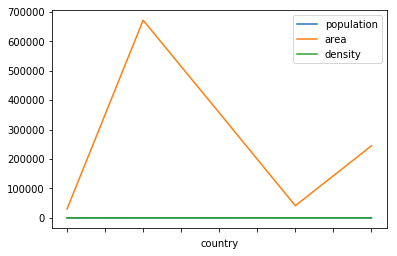

In [39]:
%matplotlib inline
countries.plot()


However, for this dataset, it does not say that much.



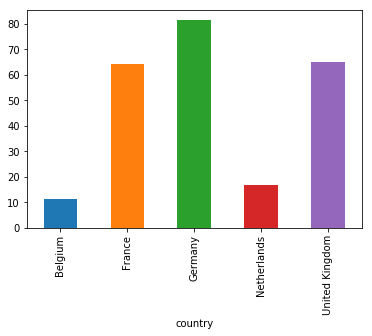

In [40]:
countries['population'].plot(kind='bar')


### Selecting data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. We now have to distuinguish between:

    selection by label
    selection by position.
For a DataFrame, basic indexing selects the columns.

Selecting a single column

In [41]:
countries['area']


country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

or multiple columns:



In [42]:
countries[['area', 'density']]


,area,density
country,,
Belgium,30510,370.370370
France,671308,95.783158
Germany,357050,227.699202
Netherlands,41526,406.973944
United Kingdom,244820,265.092721


But, slicing accesses the rows:

In [43]:
countries['France':'Netherlands']


,population,area,capital,density
country,,,,
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944


For more advanced indexing, you have some extra attributes:

    loc: selection by label
    iloc: selection by position

In [44]:
countries.loc['Germany', 'area']


357050

In [45]:
countries.loc['France':'Germany', :]


,population,area,capital,density
country,,,,
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202


In [46]:
countries.loc[countries['density']>300, ['capital', 'population']]


,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


Selecting by position with iloc works similar as indexing numpy arrays:



In [47]:
countries.iloc[0:2,1:3]


,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris


The different indexing methods can also be used to assign data:



In [48]:
countries.loc['Belgium':'Germany', 'population'] = 10


In [49]:
countries


,population,area,capital,density
country,,,,
Belgium,10.0,30510,Brussels,370.370370
France,10.0,671308,Paris,95.783158
Germany,10.0,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


### Data Cleaning :


Below is the Data cleaning functions in pandas
fillna , dropna 

In [51]:

df = pd.read_csv("C:\\Users\\akhil\\Downloads\\weather_data.csv",parse_dates=['day'])
type(df.day[0])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [52]:
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


    fill all na values with 0

In [53]:
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [54]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'No Event'
    })
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,No Event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,No Event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


    ffill - fill na values with foward cell values

In [55]:
new_df = df.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


    bfill - bfill na values with backward cell values

In [56]:
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


    DataFrame.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None, **kwargs)

In [57]:
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [58]:
new_df = df.interpolate(method="time") 
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)

There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc.

In [59]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [60]:
new_df = df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny
